# Load the data

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy as sp

# from scipy.special import erfinv
from scipy.stats import norm

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

# from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

%matplotlib inline

import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
seed=0

In [69]:
from sklearn.externals import joblib

pred_val_xgb,pred_xgb = joblib.load('./xgb_bagged_prediction_val.pkl')
pred_val_lgbm,pred_lgbm = joblib.load('./LightGBM_bagged_prediction_val.pkl')

y_val = joblib.load('./LightGBM_bagged_y_val.pkl') 

In [70]:
print(len(pred_xgb))
print(len(pred_val_xgb))
print(len(pre_lgbm))
print(len(pred_val_lgbm))

125546
18800
125546
18800


In [71]:
def lossRestore(logloss, ymean, ystd):
    loss = np.exp(logloss*ystd+ymean)
    return loss

# Preprocessing and Transformation

In [72]:
ys = [y_val,pred_val_xgb,pred_val_lgbm]

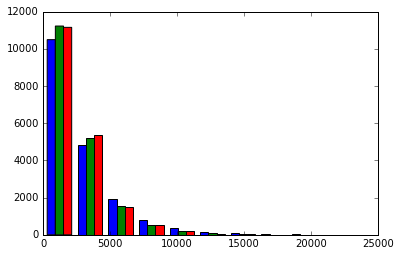

In [73]:
plt.figure()
plt.hist(ys);

In [74]:
np.corrcoef(np.array(ys))

array([[ 1.        ,  0.77467877,  0.77453155],
       [ 0.77467877,  1.        ,  0.99553522],
       [ 0.77453155,  0.99553522,  1.        ]])

# Try different averages

In [75]:
from sklearn.metrics import mean_absolute_error

In [76]:
ws = [k/10.0 for k in range(0,11)]
names = ['arith','harm','geom']
avgs = {names[0]:[],names[1]:[],names[2]:[]}
for w in ws:
    w1 = w
    w2 = 1.0-w
    print((w1,w2))
    
    arithAvg = ys[1]*w1+ys[2]*w2
    avgs[names[0]].append(arithAvg)
    print(mean_absolute_error(ys[0],arithAvg))
    
    harmAvg = 1.0/(w1/ys[1] + w2/ys[2])
    avgs[names[1]].append(harmAvg)
    print(mean_absolute_error(ys[0],harmAvg))
    
    geomAvg = np.exp(w1*np.log(ys[1]) + w2*np.log(ys[2]))
    avgs[names[2]].append(geomAvg)
    print(mean_absolute_error(ys[0],geomAvg))
    print('\n')
        

(0.0, 1.0)
1093.94467002
1093.94467002
1093.94467002


(0.1, 0.9)
1092.96596478
1092.98760723
1092.97742624


(0.2, 0.8)
1092.17074768
1092.20237505
1092.18631563


(0.3, 0.7)
1091.53847175
1091.58269963
1091.55966601


(0.4, 0.6)
1091.06361754
1091.11115523
1091.0865163


(0.5, 0.5)
1090.7210407
1090.7693482
1090.74438689


(0.6, 0.4)
1090.52917766
1090.56720183
1090.54622173


(0.7, 0.30000000000000004)
1090.48099588
1090.51094084
1090.49535844


(0.8, 0.19999999999999996)
1090.57154851
1090.58875763
1090.5807152


(0.9, 0.09999999999999998)
1090.81529852
1090.82123102
1090.81905714


(1.0, 0.0)
1091.20516953
1091.20516965
1091.20518083




### The best weights are 

In [ ]:
kerasdf = pd.to_csv('../output/keras_bagging_5folds.csv')
kerasdf = pd.to_csv('../output/keras_bagging_5folds.csv')
kerasdf = pd.to_csv('../output/keras_bagging_5folds.csv')

In [77]:
# arithmatic w1 0.5, w2 0.5
w1=0.5
w2 = 0.5

In [78]:
arithAvg = pred_xgb*w1 + pred_lgbm*w2
harmAvg = 1.0/(w1/pred_xgb + w2/pred_lgbm)
geomAvg = np.exp(w1*np.log(pred_xgb) + w2*np.log(pred_lgbm))

# Save All Ensembles

In [79]:
submission = pd.read_csv('../input/sample_submission.csv')

In [80]:
submission['loss'] = arithAvg
submission.to_csv('../output/arithAvg.csv',index=False)

submission['loss'] = harmAvg
submission.to_csv('../output/harmAvg.csv',index=False)

submission['loss'] = geomAvg
submission.to_csv('../output/geomAvg.csv',index=False)

In [61]:
submission.shape

(125546, 2)

In [62]:
len(arithAvg)

18800